## Visualizing Categorical Distributions

Visualizing Categorical Distributions 
Data come in many forms that are not numerical. Data can be pieces of music, or places on a map. They can also be categories into which you can place individuals. Here are some examples of categorical variables.
The individuals are cartons of ice-cream, and the variable is the flavor in the carton.
The individuals are professional basketball players, and the variable is the player's team.
The individuals are years, and the variable is the genre of the highest grossing movie of the year.
The individuals are survey respondents, and the variable is the response they choose from among "Not at all satisfied," "Somewhat satisfied," and "Very satisfied."

The table icecream contains data on 30 cartons of ice-cream.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
icecream = pd.DataFrame({
    'Flavor': np.array(['Chocolate', 'Strawberry', 'Vanilla']),
    'Number of Cartons': np.array([16, 5, 9])
})

icecream

,Flavor,Number of Cartons
0,Chocolate,16
1,Strawberry,5
2,Vanilla,9


The values of the categorical variable "flavor" are chocolate, strawberry, and vanilla. The table shows the number of cartons of each flavor. We call this a distribution table. A distribution shows all the values of a variable, along with the frequency of each one.

Bar Chart 
The bar chart is a familiar way of visualizing categorical distributions. It displays a bar for each category. The bars are equally spaced and equally wide. The length of each bar is proportional to the frequency of the corresponding category.

We will draw bar charts with horizontal bars because it's easier to label the bars that way. The Table method is therefore called barh. It takes two arguments: the first is the column label of the categories, and the second is the column label of the frequencies.

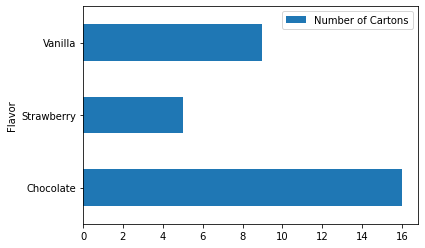

In [3]:
ax = icecream.plot.barh(x='Flavor', y='Number of Cartons')

If the table consists just of a column of categories and a column of frequencies, as in icecream, the method call is even simpler. You can just specify the column containing the categories, and barh will use the values in the other column as frequencies.

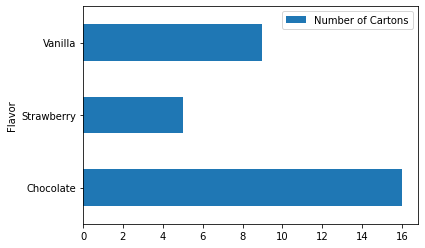

In [4]:
ax = icecream.plot.barh('Flavor')

Features of Categorical Distributions 
Apart from purely visual differences, there is an important fundamental distinction between bar charts and the two graphs that we saw in the previous sections. Those were the scatter plot and the line plot, both of which display two numerical variables – the variables on both axes are numerical. In contrast, the bar chart has categories on one axis and numerical frequencies on the other.

This has consequences for the chart. First, the width of each bar and the space between consecutive bars is entirely up to the person who is producing the graph, or to the program being used to produce it. Python made those choices for us. If you were to draw the bar graph by hand, you could make completely different choices and still have a perfectly correct bar graph, provided you drew all the bars with the same width and kept all the spaces the same.

Most importantly, the bars can be drawn in any order. The categories "chocolate," "vanilla," and "strawberry" have no universal rank order, unlike for example the numbers 5, 7, and 10.

This means that we can draw a bar chart that is easier to interpret, by rearranging the bars in decreasing order. To do this, we first rearrange the rows of icecream in decreasing order of Number of Cartons, and then draw the bar chart.

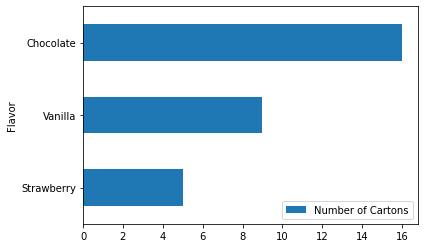

In [5]:
#icecream.sort('Number of Cartons', descending=True).barh('Flavor')
ax = icecream.sort_values('Number of Cartons', ascending=True).plot.barh('Flavor')

This bar chart contains exactly the same information as the previous ones, but it is a little easier to read. While this is not a huge gain in reading a chart with just three bars, it can be quite significant when the number of categories is large.



## Grouping Categorical Data 
To construct the table icecream, someone had to look at all 30 cartons of ice-cream and count the number of each flavor. But if our data does not already include frequencies, we have to compute the frequencies before we can draw a bar chart. Here is an example where this is necessary.

The table top consists of U.S.A.'s top grossing movies of all time. The first column contains the title of the movie; Star Wars: The Force Awakens has the top rank, with a box office gross amount of more than 900 million dollars in the United States. The second column contains the name of the studio that produced the movie. The third contains the domestic box office gross in dollars, and the fourth contains the gross amount that would have been earned from ticket sales at 2016 prices. The fifth contains the release year of the movie.

There are 200 movies on the list. Here are the top ten according to unadjusted gross receipts.

In [6]:
movies = pd.read_csv( 'top_movies.csv')
movies

,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
...,...,...,...,...,...
195,The Caine Mutiny,Columbia,21750000,386173500,1954
196,The Bells of St. Mary's,RKO,21333333,545882400,1945
197,Duel in the Sun,Selz.,20408163,443877500,1946
198,Sergeant York,Warner Bros.,16361885,418671800,1941


The Disney subsidiary Buena Vista shows up frequently in the top ten, as do Fox and Warner Brothers. Which studios will appear most frequently if we look among all 200 rows?

To figure this out, first notice that all we need is a table with the movies and the studios; the other information is unnecessary.

In [7]:
movies_and_studios=movies[['Title','Studio']]
movies_and_studios

,Title,Studio
0,Star Wars: The Force Awakens,Buena Vista (Disney)
1,Avatar,Fox
2,Titanic,Paramount
3,Jurassic World,Universal
4,Marvel's The Avengers,Buena Vista (Disney)
...,...,...
195,The Caine Mutiny,Columbia
196,The Bells of St. Mary's,RKO
197,Duel in the Sun,Selz.
198,Sergeant York,Warner Bros.


The Table method group allows us to count how frequently each studio appears in the table, by calling each studio a category and assigning each row to one category. The group method takes as its argument the label of the column that contains the categories, and returns a table of counts of rows in each category. The column of counts is always called count, but you can change that if you like by using relabeled.

In [8]:
p=movies_and_studios[['Studio']]
p

,Studio
0,Buena Vista (Disney)
1,Fox
2,Paramount
3,Universal
4,Buena Vista (Disney)
...,...
195,Columbia
196,RKO
197,Selz.
198,Warner Bros.


In [9]:
dups_shape = movies_and_studios.pivot_table(index=['Studio'], aggfunc=['size'])

dups_shape


,size
Studio,
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7


In [10]:
df = dups_shape.reset_index()
df=df.rename(columns={'size': 'Count'})
df

,Studio,Count
0,AVCO,1
1,Buena Vista (Disney),29
2,Columbia,10
3,Disney,11
4,Dreamworks,3
5,Fox,26
6,IFC,1
7,Lionsgate,3
8,MGM,7
9,MPC,1


We can now use this table, along with the graphing skills that we acquired above, to draw a bar chart that shows which studios are most frequent among the 200 highest grossing movies.

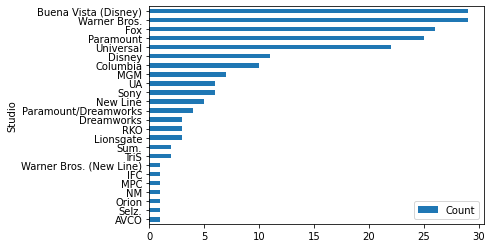

In [11]:
ax = df.sort_values('Count', ascending=True).plot.barh('Studio')

Warner Brothers and Buena Vista are the most common studios among the top 200 movies. Warner Brothers produces the Harry Potter movies and Buena Vista produces Star Wars.

Because total gross receipts are being measured in unadjusted dollars, it is not very surprising that the top movies are more frequently from recent years than from bygone decades. In absolute terms, movie tickets cost more now than they used to, and thus gross receipts are higher. This is borne out by a bar chart that show the distribution of the 200 movies by year of release.

In [12]:
movies_and_years = movies[['Title', 'Year']]
p=movies_and_years[['Year']]
dups_shape = movies_and_years.pivot_table(index=['Year'], aggfunc=['size'])
df = dups_shape.reset_index()
df=df.rename(columns={'size': 'Count'})
df

,Year,Count
0,1921,1
1,1937,1
2,1939,1
3,1940,1
4,1941,2
...,...,...
65,2011,2
66,2012,5
67,2013,4
68,2014,3


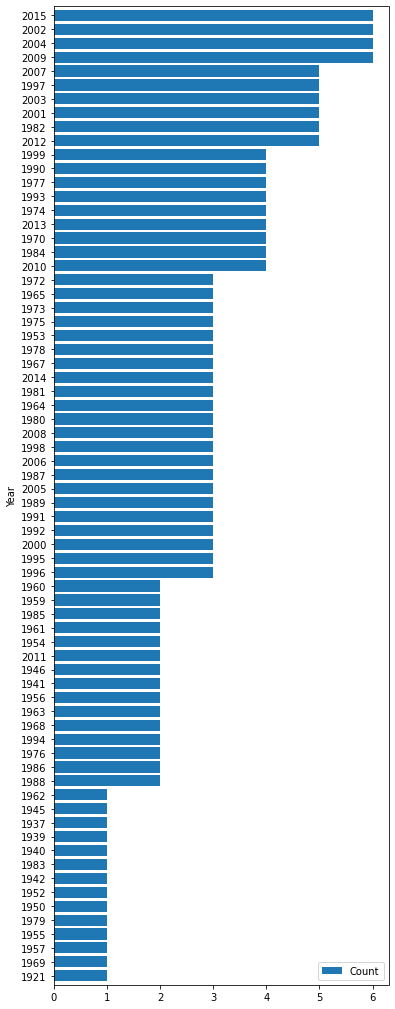

In [13]:

ax = df.sort_values('Count', ascending=True).plot.barh('Year',width=0.8, figsize=(6,18))

## Towards numerical variables

There is something unsettling about this chart. Though it does answer the question of which release years appear most frequently among the 200 top grossing movies, it doesn't list all the years in chronological order. It is treating Year as a categorical variable.

But years are fixed chronological units that do have an order. They also have fixed numerical spacings relative to each other. Let's see what happens when we try to take that into account.

By default, barh sorts the categories (years) from lowest to highest. So we will run the code without sorting by count.

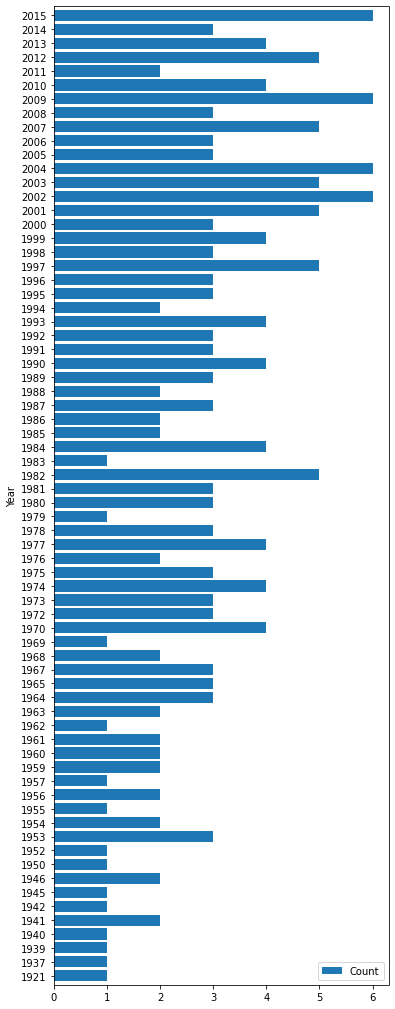

In [14]:

ax = df.sort_values('Year', ascending=True).plot.barh('Year',width=0.8, figsize=(6,18))